In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], inplace=True)
df.dropna(inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [11]:
# alone dan not alone
df['Alone'] = (df['Parch'] + df['SibSp']).apply(lambda x: 1 if x == 0 else 0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,0
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
889,1,1,male,26.0,0,0,C,1


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

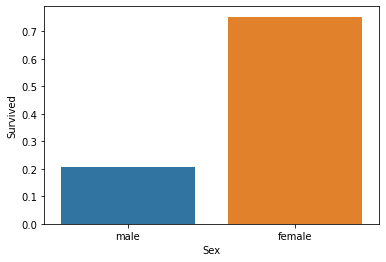

In [12]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data = df, ci=None)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

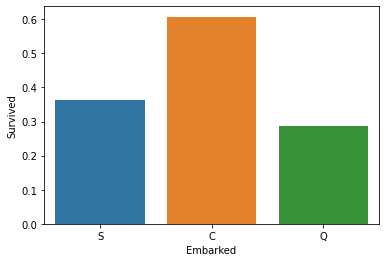

In [13]:
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)

[Text(0, 0, 'Not Alone'), Text(1, 0, 'Alone')]

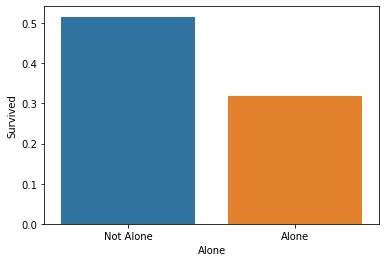

In [14]:
ax = sns.barplot(x='Alone', y='Survived', data=df, ci=None)
ax.set_xticklabels(['Not Alone', 'Alone'])

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])
sex_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(sex_labels)

{'female': 0, 'male': 1}


In [16]:
le.fit(df["Embarked"])
df['Embarked']=le.transform(df['Embarked'])
embarked_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(embarked_labels)

{'C': 0, 'Q': 1, 'S': 2}


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,0,3,1,22.0,1,0,2,0
1,1,1,0,38.0,1,0,0,0
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,2,0
4,0,3,1,35.0,0,0,2,1
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,1,0
886,0,2,1,27.0,0,0,2,1
887,1,1,0,19.0,0,0,2,1
889,1,1,1,26.0,0,0,0,1


In [20]:
X = df.iloc[:,1:]
X

,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,0
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,0
4,3,1,35.0,0,0,2,1
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,1,0
886,2,1,27.0,0,0,2,1
887,1,0,19.0,0,0,2,1
889,1,1,26.0,0,0,0,1


In [21]:
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [23]:
# Metode Filter -> Chi Square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attr','Score']  #naming the dataframe columns

print(featureScores.nlargest(4, 'Score'))

     Attr      Score
1     Sex  74.621277
2     Age  34.246098
0  Pclass  28.243213
6   Alone  12.367930
